In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

In [3]:
import pandas as pd

# 저장된 피처 튜닝 데이터 불러오기
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/악성 URL/DATA/Real_train.csv')

In [4]:
X,y = train.drop(columns=['ID','URL','label']),train['label']


X_sampled = X.sample(n=70000, random_state=42, replace=True)
y_sampled = y.loc[X_sampled.index]
# 샘플링된 데이터를 바탕으로 train, test split
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, stratify=y_sampled, random_state=42)

In [5]:
algorithm = lgb.LGBMClassifier
algorithm_name = 'lgb'

# 시각화 정의

In [ ]:
import matplotlib.pyplot as plt

def optimi_visualization(algorithm_name, x_values, train_score, test_score, xlabel, filename):
    # 하이퍼파라미터 조정에 따른 학습 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, train_score, linestyle = '-', label = 'train score')
    # 하이퍼파라미터 조정에 따른 테스트 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, test_score, linestyle = '--', label = 'test score')
    plt.ylabel('Accuracy(%)') # y축 라벨
    plt.xlabel(xlabel) # x축 라벨
    plt.legend() # 범례표시
    plt.show()  # 시각화를 화면에 출력

# 트리 개수

In [ ]:

def optimi_estimator(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_estimator_min, n_estimator_max):
    train_score = []
    test_score = []
    para_n_tree = [n_tree * 5 for n_tree in range(n_estimator_min, n_estimator_max)]

    for v_n_estimators in para_n_tree:
        model = algorithm(n_estimators=v_n_estimators, random_state=1234)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 트리 개수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'n_estimators': para_n_tree, 'TrainScore': train_score, 'TestScore': test_score})
    # 트리 개수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_n_tree, train_score, test_score, "The number of estimator", "n_estimator")

    print(round(df_score_n, 4))

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008906 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [In

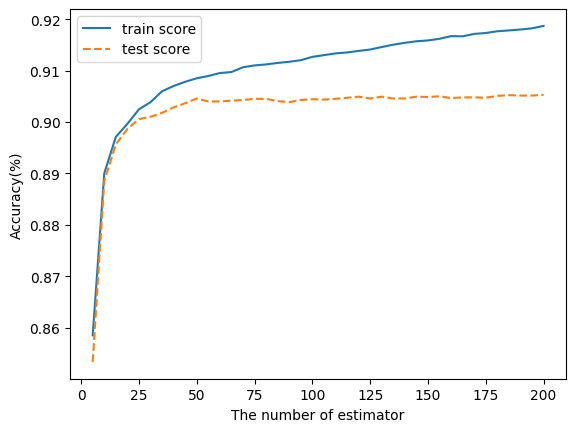

    n_estimators  TrainScore  TestScore
0              5      0.8585     0.8534
1             10      0.8900     0.8885
2             15      0.8971     0.8956
3             20      0.8996     0.8986
4             25      0.9025     0.9006
5             30      0.9039     0.9010
6             35      0.9060     0.9018
7             40      0.9070     0.9029
8             45      0.9078     0.9036
9             50      0.9085     0.9046
10            55      0.9089     0.9040
11            60      0.9095     0.9040
12            65      0.9097     0.9041
13            70      0.9106     0.9043
14            75      0.9110     0.9045
15            80      0.9112     0.9045
16            85      0.9115     0.9041
17            90      0.9117     0.9039
18            95      0.9120     0.9043
19           100      0.9127     0.9044
20           105      0.9130     0.9044
21           110      0.9133     0.9045
22           115      0.9135     0.9047
23           120      0.9138     0.9049


In [ ]:
n_estimator_min = 1
n_estimator_max = 41
optimi_estimator(algorithm, algorithm_name,
                 X_train, y_train, X_test, y_test,
                 n_estimator_min, n_estimator_max)

In [ ]:
n_estimator = 200

# 트리 깊이

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score

def optimi_maxdepth(algorithm, algorithm_name, x_train, y_train, x_test, y_test, depth_min, depth_max, n_estimator):
    train_score = []  # 훈련 데이터 정확도 저장
    test_score = []   # 테스트 데이터 정확도 저장
    para_depth = [depth for depth in range(depth_min, depth_max + 1)]  # depth 범위 설정

    # 각 max_depth 값에 대해 반복
    for v_max_depth in para_depth:
        # lightGBM 모델을 사용할 때 max_depth와 n_estimators 설정
        model = algorithm(max_depth=v_max_depth,
                          n_estimators=n_estimator,
                          random_state=1234)

        model.fit(x_train, y_train)  # 모델 학습

        # 훈련 데이터 정확도 계산
        train_score.append(model.score(x_train, y_train))  # 학습 데이터 정확도 저장
        # 테스트 데이터 정확도 계산
        test_score.append(model.score(x_test, y_test))  # 테스트 데이터 정확도 저장

    # 최대 깊이에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'depth': para_depth, 'TrainScore': train_score, 'TestScore': test_score})
    # 최대 깊이에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_depth, train_score, test_score, "The number of depth", "n_depth")

    # 결과 출력
    print(round(df_score_n, 4))



[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007232 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

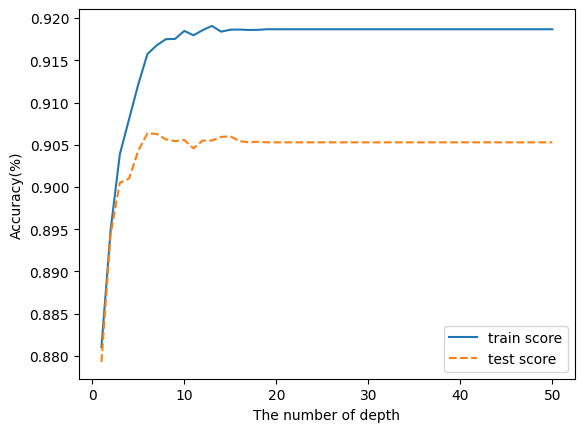

    depth  TrainScore  TestScore
0       1      0.8810     0.8793
1       2      0.8949     0.8944
2       3      0.9039     0.9005
3       4      0.9080     0.9010
4       5      0.9121     0.9043
5       6      0.9158     0.9064
6       7      0.9168     0.9063
7       8      0.9175     0.9056
8       9      0.9175     0.9054
9      10      0.9185     0.9056
10     11      0.9180     0.9046
11     12      0.9186     0.9055
12     13      0.9191     0.9055
13     14      0.9184     0.9059
14     15      0.9186     0.9060
15     16      0.9186     0.9054
16     17      0.9186     0.9053
17     18      0.9186     0.9054
18     19      0.9187     0.9053
19     20      0.9187     0.9053
20     21      0.9187     0.9053
21     22      0.9187     0.9053
22     23      0.9187     0.9053
23     24      0.9187     0.9053
24     25      0.9187     0.9053
25     26      0.9187     0.9053
26     27      0.9187     0.9053
27     28      0.9187     0.9053
28     29      0.9187     0.9053
29     30 

In [ ]:
depth_min = 1
depth_max = 50

optimi_maxdepth(algorithm, algorithm_name,
                X_train, y_train, X_test, y_test,
                depth_min, depth_max, n_estimator)


In [ ]:
print(len(X_train), len(y_train), len(X_test), len(y_test))


56000 56000 14000 14000


In [ ]:
print(X_train.shape, y_train.shape)


(56000, 10) (56000,)


In [ ]:
import numpy as np

# X_train, y_train에 결측값이 있는지 확인
print(np.any(np.isnan(X_train)))  # X_train에 결측값이 있으면 True 반환
print(np.any(np.isnan(y_train)))  # y_train에 결측값이 있으면 True 반환
# X_test, y_test에 결측값이 있는지 확인
print(np.any(np.isnan(X_test)))  # X_test에 결측값이 있으면 True 반환
print(np.any(np.isnan(y_test)))  # y_test에 결측값이 있으면 True 반환


False
False
False
False


In [ ]:
n_depth = 10

# 리프 노드 수

In [ ]:
def optimi_leafnode(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_leafnode_min, n_leafnode_max, n_estimator, n_depth):
    train_score = []  # 훈련 데이터 정확도 저장
    test_score = []   # 테스트 데이터 정확도 저장
    para_leafnode = [leaf for leaf in range(n_leafnode_min, n_leafnode_max + 1)]  # leaf_nodes 범위 설정

    # 각 leaf_nodes 값에 대해 반복
    for v_leaf_node in para_leafnode:
        # lightGBM 모델을 사용할 때 max_depth, n_estimators, num_leaves 설정
        model = algorithm(max_depth=n_depth,
                          n_estimators=n_estimator,
                          num_leaves=v_leaf_node,
                          random_state=1234)

        model.fit(x_train, y_train)  # 모델 학습

        # 훈련 데이터 정확도 계산
        train_pred = model.predict(x_train)
        train_accuracy = accuracy_score(y_train, train_pred)
        train_score.append(train_accuracy)

        # 테스트 데이터 정확도 계산
        test_pred = model.predict(x_test)
        test_accuracy = accuracy_score(y_test, test_pred)
        test_score.append(test_accuracy)

    # 리프 노드에 따른 모델 성능 저장
    df_score_leafnode = pd.DataFrame({'LeafNode': para_leafnode, 'TrainScore': train_score, 'TestScore': test_score})
    # 리프 노드에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_leafnode, train_score, test_score, "The number of leaf nodes", "n_leaf_nodes")
    print(round(df_score_leafnode, 4))


[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009894 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [b

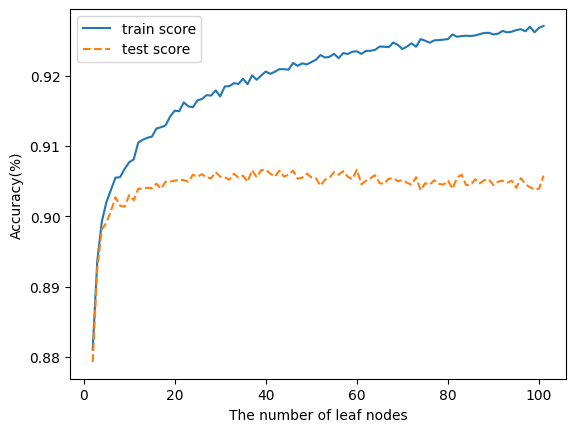

    LeafNode  TrainScore  TestScore
0          2      0.8810     0.8793
1          3      0.8936     0.8926
2          4      0.8992     0.8981
3          5      0.9020     0.8991
4          6      0.9038     0.9008
5          7      0.9055     0.9027
6          8      0.9056     0.9015
7          9      0.9067     0.9014
8         10      0.9077     0.9030
9         11      0.9081     0.9023
10        12      0.9105     0.9039
11        13      0.9109     0.9039
12        14      0.9112     0.9041
13        15      0.9113     0.9040
14        16      0.9125     0.9046
15        17      0.9127     0.9039
16        18      0.9129     0.9049
17        19      0.9142     0.9049
18        20      0.9150     0.9051
19        21      0.9149     0.9052
20        22      0.9162     0.9051
21        23      0.9156     0.9049
22        24      0.9155     0.9059
23        25      0.9165     0.9056
24        26      0.9167     0.9060
25        27      0.9172     0.9055
26        28      0.9172    

In [ ]:
n_leafnode_min = 2
n_leafnode_max = 101
# 데이터프레임 행 최대 100개까지 반드시 출력
pd.set_option('display.max_row', 100)
optimi_leafnode (algorithm, algorithm_name,
                 X_train, y_train, X_test, y_test,
                 n_leafnode_min, n_leafnode_max, n_estimator, n_depth)

In [ ]:
n_leafnode = 100

# 리프 노드 최소 샘플 수

In [ ]:
def optimi_minleaf_sample(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split):
    train_score = []; test_score = []
    para_leaf = [n_leaf*2 for n_leaf in range(n_leaf_min, n_leaf_max)]

    for v_min_samples_leaf in para_leaf:
      model = algorithm(min_samples_leaf = v_min_samples_leaf,
                                n_estimators = n_estimator,
                                max_depth = n_depth,
                                min_samples_split = n_split,
                                random_state=1234)
      model.fit(x_train, y_train)
      train_score.append(model.score(x_train, y_train))
      test_score.append(model.score(x_test, y_test))

    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'min_samples_leaf': para_leaf, 'TrainScore': train_score, 'TestScore': test_score})
    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_leaf, train_score, test_score, "The minimum number of samples required to be at a leaf node", "min_samples_leaf")
    print(round(df_score_n, 4))

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] min_data_i

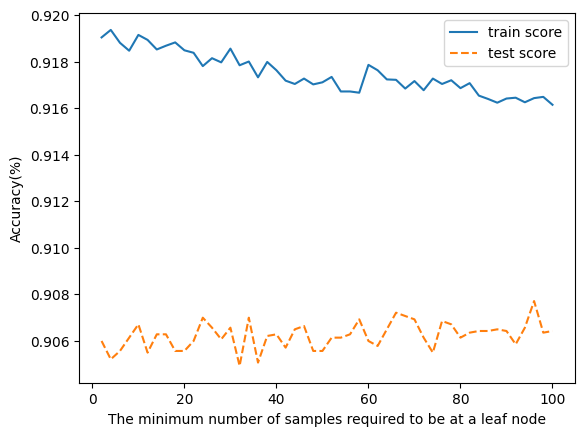

    min_samples_leaf  TrainScore  TestScore
0                  2      0.9190     0.9060
1                  4      0.9194     0.9052
2                  6      0.9188     0.9056
3                  8      0.9185     0.9061
4                 10      0.9191     0.9067
5                 12      0.9189     0.9055
6                 14      0.9185     0.9063
7                 16      0.9187     0.9063
8                 18      0.9188     0.9056
9                 20      0.9185     0.9056
10                22      0.9184     0.9060
11                24      0.9178     0.9070
12                26      0.9181     0.9066
13                28      0.9180     0.9061
14                30      0.9186     0.9066
15                32      0.9178     0.9049
16                34      0.9180     0.9070
17                36      0.9173     0.9051
18                38      0.9180     0.9062
19                40      0.9176     0.9063
20                42      0.9172     0.9057
21                44      0.9170

In [ ]:
n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf_sample(algorithm, algorithm_name,
               X_train, y_train, X_test, y_test,
               n_leaf_min, n_leaf_max, n_estimator, n_depth, n_leafnode)

In [ ]:
n_leaf = 96

# 최적화

In [ ]:
def model_final(algorithm, algorithm_name,
                    X_train, y_train, X_test, y_test,
                    n_estimator, n_depth, n_leafnode, n_leaf):
    # 모델 정의 (여기서는 LGBMClassifier 사용)
    model = algorithm(n_estimators=n_estimator,
                      max_depth=n_depth,
                      min_child_samples=n_leafnode,
                      num_leaves=n_leaf)

    # 모델 학습
    model.fit(X_train, y_train)

    # 테스트 데이터 예측 (확률을 사용하여 AUC 계산)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # 확률을 사용하여 AUC 계산

    # AUC-ROC 계산
    auc_score = roc_auc_score(y_test, y_pred_prob)

    # AUC-ROC 출력
    print(f"{algorithm_name} - AUC-ROC Score: {auc_score:.4f}")

# 예시로 LightGBM 모델을 사용
model_final(lgb.LGBMClassifier, 'lgb', X_train, y_train, X_test, y_test,
                n_estimator, n_depth, n_leafnode, n_leaf)

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [ ]:
# LightGBM 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200],  # 트리 개수
    'learning_rate': [0.01, 0.1],  # 학습률
    'max_depth': [20, 30],  # 최대 깊이
    'num_leaves': [31, 50],  # 리프 노드 수
    'min_child_samples': [25, 50, 100],  # 리프 노드의 최소 샘플 수
    'colsample_bytree': [0.8, 1.0]  # 트리별 특성 샘플링 비율
}

# GridSearchCV 실행
grid_search = GridSearchCV(
    lgb.LGBMClassifier(),
    param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train[:100000], y_train[:100000])

# 최적의 파라미터 출력
print('최적의 파라미터 조합:', grid_search.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[LightGBM] [Info] Number of positive: 22394, number of negative: 77606
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 549
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223940 -> initscore=-1.242852
[LightGBM] [Info] Start training from score -1.242852
최적의 파라미터 조합: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 30, 'min_child_samples': 25, 'n_estimators': 200, 'num_leaves': 50}


In [ ]:
# 최적의 LightGBM 모델 가져오기
LGBM_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측 확률
y_pred_proba = LGBM_model.predict_proba(X_test)[:, 1]

# ROC AUC 점수 계산
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.9276794504586703


#Optuna 사용해보기

In [ ]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 20.3 MB/s eta 0:00:00


In [ ]:
import optuna
from optuna.samplers import TPESampler
from optuna.pruners import MedianPruner
import numpy as np


In [ ]:
# Objective function 정의
def objective(trial):
    # 하이퍼파라미터 범위 설정
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 3, 30)
    num_leaves = trial.suggest_int('num_leaves', 20, 200)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
    min_child_samples = trial.suggest_int('min_child_samples', 1, 100)
    subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1.0)

    # LightGBM 모델 정의
    model = lgb.LGBMClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        num_leaves=num_leaves,
        learning_rate=learning_rate,
        min_child_samples=min_child_samples,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=42
    )

    # 모델 학습
    model.fit(X_train, y_train)

    # 테스트 데이터 예측 (확률을 사용하여 AUC 계산)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # 확률을 사용하여 AUC 계산

    # AUC-ROC 계산
    auc_score = roc_auc_score(y_test, y_pred_prob)

    return auc_score

# Optuna 최적화 실행
study = optuna.create_study(direction='maximize')  # AUC를 최대화
study.optimize(objective, n_trials=100)

# 최적의 파라미터 출력

print("Best AUC-ROC:", study.best_value)
print("Best Hyperparameters:", study.best_params)

[I 2025-03-22 04:58:29,586] A new study created in memory with name: no-name-c37cfc0b-70f7-4599-9753-7e453a0965a9
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1.0

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2025-03-22 04:58:32,553] Trial 0 finished with value: 0.9204704772680209 and parameters: {'n_estimators': 161, 'max_depth': 28, 'num_leaves': 144, 'learning_rate': 0.05941553060465673, 'min_child_samples': 89, 'subsample': 0.5631066344484503, 'colsample_bytree': 0.5567588634768621}. Best is trial 0 with value: 0.9204704772680209.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has be

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012904 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-03-22 04:58:33,678] Trial 1 finished with value: 0.9152895246075483 and parameters: {'n_estimators': 97, 'max_depth': 6, 'num_leaves': 177, 'learning_rate': 0.018405118334315185, 'min_child_samples': 8, 'subsample': 0.8363399809217754, 'colsample_bytree': 0.7644079956968136}. Best is trial 0 with value: 0.9204704772680209.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has been

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 04:58:35,081] Trial 2 finished with value: 0.9140741464845182 and parameters: {'n_estimators': 152, 'max_depth': 22, 'num_leaves': 72, 'learning_rate': 0.004351261077078011, 'min_child_samples': 47, 'subsample': 0.5837652861586817, 'colsample_bytree': 0.9678916342098829}. Best is trial 0 with value: 0.9204704772680209.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has be

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 04:58:36,573] Trial 3 finished with value: 0.9121537344580043 and parameters: {'n_estimators': 186, 'max_depth': 6, 'num_leaves': 35, 'learning_rate': 0.005456910703959731, 'min_child_samples': 69, 'subsample': 0.7385368507156833, 'colsample_bytree': 0.5646088414208601}. Best is trial 0 with value: 0.9204704772680209.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has bee

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 04:58:37,715] Trial 4 finished with value: 0.9153178510795805 and parameters: {'n_estimators': 123, 'max_depth': 26, 'num_leaves': 38, 'learning_rate': 0.013149279680443908, 'min_child_samples': 33, 'subsample': 0.7688143063930448, 'colsample_bytree': 0.7064506366247362}. Best is trial 0 with value: 0.9204704772680209.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has be

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008925 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 04:58:39,106] Trial 5 finished with value: 0.9125989774874413 and parameters: {'n_estimators': 176, 'max_depth': 28, 'num_leaves': 41, 'learning_rate': 0.0014666042923626697, 'min_child_samples': 31, 'subsample': 0.5927895128280689, 'colsample_bytree': 0.8222169441723313}. Best is trial 0 with value: 0.9204704772680209.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006902 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2025-03-22 04:58:39,904] Trial 6 finished with value: 0.9146009340895324 and parameters: {'n_estimators': 67, 'max_depth': 25, 'num_leaves': 132, 'learning_rate': 0.015651913089153945, 'min_child_samples': 89, 'subsample': 0.7358590372927372, 'colsample_bytree': 0.5842038505153377}. Best is trial 0 with value: 0.9204704772680209.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has be

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 04:58:40,829] Trial 7 finished with value: 0.9176997595085448 and parameters: {'n_estimators': 80, 'max_depth': 24, 'num_leaves': 129, 'learning_rate': 0.008254515279717389, 'min_child_samples': 68, 'subsample': 0.968955860518711, 'colsample_bytree': 0.7692664401827136}. Best is trial 0 with value: 0.9204704772680209.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has bee

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 04:58:42,409] Trial 8 finished with value: 0.914643248401469 and parameters: {'n_estimators': 174, 'max_depth': 25, 'num_leaves': 49, 'learning_rate': 0.008297249723065784, 'min_child_samples': 90, 'subsample': 0.5343665459688041, 'colsample_bytree': 0.5852482097679303}. Best is trial 0 with value: 0.9204704772680209.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has bee

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-03-22 04:58:44,032] Trial 9 finished with value: 0.9156227479870084 and parameters: {'n_estimators': 170, 'max_depth': 6, 'num_leaves': 126, 'learning_rate': 0.012669571796554322, 'min_child_samples': 24, 'subsample': 0.5108173418873612, 'colsample_bytree': 0.91984333303458}. Best is trial 0 with value: 0.9204704772680209.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has been

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2025-03-22 04:58:46,490] Trial 10 finished with value: 0.9202871590986558 and parameters: {'n_estimators': 138, 'max_depth': 15, 'num_leaves': 187, 'learning_rate': 0.08843462428088186, 'min_child_samples': 98, 'subsample': 0.6411056326698973, 'colsample_bytree': 0.5113199238942506}. Best is trial 0 with value: 0.9204704772680209.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2025-03-22 04:58:48,962] Trial 11 finished with value: 0.9203954077322324 and parameters: {'n_estimators': 135, 'max_depth': 15, 'num_leaves': 189, 'learning_rate': 0.08760183885509075, 'min_child_samples': 98, 'subsample': 0.6297390005445123, 'colsample_bytree': 0.5232733882722927}. Best is trial 0 with value: 0.9204704772680209.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009567 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-03-22 04:58:50,647] Trial 12 finished with value: 0.9212108827206883 and parameters: {'n_estimators': 116, 'max_depth': 15, 'num_leaves': 156, 'learning_rate': 0.09952073698370255, 'min_child_samples': 73, 'subsample': 0.6574062615866243, 'colsample_bytree': 0.6680276040423181}. Best is trial 12 with value: 0.9212108827206883.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has 

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2025-03-22 04:58:52,683] Trial 13 finished with value: 0.920474262900764 and parameters: {'n_estimators': 114, 'max_depth': 19, 'num_leaves': 157, 'learning_rate': 0.03701732050897246, 'min_child_samples': 73, 'subsample': 0.6803745635227423, 'colsample_bytree': 0.6682126169087712}. Best is trial 12 with value: 0.9212108827206883.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2025-03-22 04:58:54,191] Trial 14 finished with value: 0.9204667939496761 and parameters: {'n_estimators': 104, 'max_depth': 19, 'num_leaves': 163, 'learning_rate': 0.038236483297798725, 'min_child_samples': 68, 'subsample': 0.680254244902103, 'colsample_bytree': 0.6707455892538786}. Best is trial 12 with value: 0.9212108827206883.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has 

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 04:58:55,326] Trial 15 finished with value: 0.9201543111604195 and parameters: {'n_estimators': 108, 'max_depth': 11, 'num_leaves': 83, 'learning_rate': 0.03599183475064428, 'min_child_samples': 55, 'subsample': 0.8180050391293878, 'colsample_bytree': 0.6742708980189964}. Best is trial 12 with value: 0.9212108827206883.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2025-03-22 04:58:56,406] Trial 16 finished with value: 0.9181128027351503 and parameters: {'n_estimators': 83, 'max_depth': 11, 'num_leaves': 161, 'learning_rate': 0.03597455020068716, 'min_child_samples': 77, 'subsample': 0.68093597776227, 'colsample_bytree': 0.6336230108482608}. Best is trial 12 with value: 0.9212108827206883.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has bee

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008962 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 04:58:57,070] Trial 17 finished with value: 0.9182985618337359 and parameters: {'n_estimators': 53, 'max_depth': 19, 'num_leaves': 102, 'learning_rate': 0.024703234095718212, 'min_child_samples': 56, 'subsample': 0.8830567521107582, 'colsample_bytree': 0.8420485297290832}. Best is trial 12 with value: 0.9212108827206883.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has 

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2025-03-22 04:58:58,856] Trial 18 finished with value: 0.9208819711623067 and parameters: {'n_estimators': 123, 'max_depth': 10, 'num_leaves': 165, 'learning_rate': 0.05392211118548142, 'min_child_samples': 81, 'subsample': 0.6877960629748209, 'colsample_bytree': 0.7264339027098022}. Best is trial 12 with value: 0.9212108827206883.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has 

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012578 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-03-22 04:59:01,287] Trial 19 finished with value: 0.9207509941159282 and parameters: {'n_estimators': 144, 'max_depth': 11, 'num_leaves': 198, 'learning_rate': 0.058997191454657205, 'min_child_samples': 83, 'subsample': 0.7835131259261675, 'colsample_bytree': 0.8157099227633416}. Best is trial 12 with value: 0.9212108827206883.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2025-03-22 04:59:02,561] Trial 20 finished with value: 0.896083957324489 and parameters: {'n_estimators': 197, 'max_depth': 3, 'num_leaves': 111, 'learning_rate': 0.001688953171430485, 'min_child_samples': 45, 'subsample': 0.893657402930267, 'colsample_bytree': 0.7290080756558629}. Best is trial 12 with value: 0.9212108827206883.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 12614, number of negative: 43386


<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1.0)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009528 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2025-03-22 04:59:04,296] Trial 21 finished with value: 0.9207547066669581 and parameters: {'n_estimators': 140, 'max_depth': 12, 'num_leaves': 199, 'learning_rate': 0.05748443012574335, 'min_child_samples': 81, 'subsample': 0.7728799199335107, 'colsample_bytree': 0.8495438687948837}. Best is trial 12 with value: 0.9212108827206883.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has 

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-03-22 04:59:05,856] Trial 22 finished with value: 0.920704177970459 and parameters: {'n_estimators': 123, 'max_depth': 13, 'num_leaves': 174, 'learning_rate': 0.061241714469309164, 'min_child_samples': 60, 'subsample': 0.7225555047103088, 'colsample_bytree': 0.8876958607803449}. Best is trial 12 with value: 0.9212108827206883.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has 

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008965 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-03-22 04:59:07,118] Trial 23 finished with value: 0.9211640519588763 and parameters: {'n_estimators': 130, 'max_depth': 9, 'num_leaves': 200, 'learning_rate': 0.09559633433024996, 'min_child_samples': 79, 'subsample': 0.6339258040379627, 'colsample_bytree': 0.7795213369140187}. Best is trial 12 with value: 0.9212108827206883.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-03-22 04:59:08,030] Trial 24 finished with value: 0.920638609057385 and parameters: {'n_estimators': 92, 'max_depth': 8, 'num_leaves': 147, 'learning_rate': 0.09588187055594834, 'min_child_samples': 62, 'subsample': 0.6539278341241341, 'colsample_bytree': 0.7809235246911299}. Best is trial 12 with value: 0.9212108827206883.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has bee

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2025-03-22 04:59:09,550] Trial 25 finished with value: 0.9180578891358596 and parameters: {'n_estimators': 126, 'max_depth': 9, 'num_leaves': 178, 'learning_rate': 0.025131410678979386, 'min_child_samples': 82, 'subsample': 0.6122959609805154, 'colsample_bytree': 0.6319098524009508}. Best is trial 12 with value: 0.9212108827206883.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has 

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2025-03-22 04:59:10,225] Trial 26 finished with value: 0.9139676371957156 and parameters: {'n_estimators': 117, 'max_depth': 3, 'num_leaves': 146, 'learning_rate': 0.09875677135595369, 'min_child_samples': 74, 'subsample': 0.7153467763529674, 'colsample_bytree': 0.6965408649946473}. Best is trial 12 with value: 0.9212108827206883.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1.0)


[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2025-03-22 04:59:12,022] Trial 27 finished with value: 0.9206266967381351 and parameters: {'n_estimators': 129, 'max_depth': 16, 'num_leaves': 169, 'learning_rate': 0.052278087476929275, 'min_child_samples': 100, 'subsample': 0.563959020606194, 'colsample_bytree': 0.7353194878812354}. Best is trial 12 with value: 0.9212108827206883.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2025-03-22 04:59:14,641] Trial 28 finished with value: 0.9130263447298321 and parameters: {'n_estimators': 156, 'max_depth': 9, 'num_leaves': 186, 'learning_rate': 0.0024828272362843154, 'min_child_samples': 91, 'subsample': 0.6874126554350707, 'colsample_bytree': 0.6352713567253213}. Best is trial 12 with value: 0.9212108827206883.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2025-03-22 04:59:16,739] Trial 29 finished with value: 0.9211751311465959 and parameters: {'n_estimators': 150, 'max_depth': 13, 'num_leaves': 149, 'learning_rate': 0.07316768949661104, 'min_child_samples': 84, 'subsample': 0.5546714262170324, 'colsample_bytree': 0.7271415334253143}. Best is trial 12 with value: 0.9212108827206883.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has 

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-03-22 04:59:18,465] Trial 30 finished with value: 0.9214752485099809 and parameters: {'n_estimators': 163, 'max_depth': 14, 'num_leaves': 102, 'learning_rate': 0.0757349605758412, 'min_child_samples': 63, 'subsample': 0.5564286619282638, 'colsample_bytree': 0.7936519228872878}. Best is trial 30 with value: 0.9214752485099809.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-03-22 04:59:20,541] Trial 31 finished with value: 0.9212350289187262 and parameters: {'n_estimators': 163, 'max_depth': 14, 'num_leaves': 109, 'learning_rate': 0.07372793269560039, 'min_child_samples': 62, 'subsample': 0.5456847608293879, 'colsample_bytree': 0.778904871797992}. Best is trial 30 with value: 0.9214752485099809.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013618 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-03-22 04:59:22,991] Trial 32 finished with value: 0.9213428244456812 and parameters: {'n_estimators': 165, 'max_depth': 14, 'num_leaves': 107, 'learning_rate': 0.07056893306449227, 'min_child_samples': 62, 'subsample': 0.504121502016868, 'colsample_bytree': 0.8099528499371302}. Best is trial 30 with value: 0.9214752485099809.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 04:59:24,820] Trial 33 finished with value: 0.9210205194741719 and parameters: {'n_estimators': 169, 'max_depth': 17, 'num_leaves': 93, 'learning_rate': 0.02465304807865264, 'min_child_samples': 44, 'subsample': 0.5028264016001401, 'colsample_bytree': 0.8839851969762174}. Best is trial 30 with value: 0.9214752485099809.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009005 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-03-22 04:59:27,593] Trial 34 finished with value: 0.9214398477281118 and parameters: {'n_estimators': 193, 'max_depth': 17, 'num_leaves': 114, 'learning_rate': 0.07012994014059283, 'min_child_samples': 51, 'subsample': 0.5357804028791104, 'colsample_bytree': 0.7982304199576781}. Best is trial 30 with value: 0.9214752485099809.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has 

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-03-22 04:59:30,081] Trial 35 finished with value: 0.9214721790780269 and parameters: {'n_estimators': 200, 'max_depth': 17, 'num_leaves': 66, 'learning_rate': 0.04543527061937149, 'min_child_samples': 50, 'subsample': 0.5277596206112353, 'colsample_bytree': 0.8031200042090173}. Best is trial 30 with value: 0.9214752485099809.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-03-22 04:59:31,995] Trial 36 finished with value: 0.9214171193153097 and parameters: {'n_estimators': 198, 'max_depth': 21, 'num_leaves': 67, 'learning_rate': 0.043295443307061254, 'min_child_samples': 51, 'subsample': 0.5874322287107272, 'colsample_bytree': 0.9586565796169411}. Best is trial 30 with value: 0.9214752485099809.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has 

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 04:59:33,701] Trial 37 finished with value: 0.9207944192699055 and parameters: {'n_estimators': 196, 'max_depth': 21, 'num_leaves': 57, 'learning_rate': 0.04538530821804117, 'min_child_samples': 36, 'subsample': 0.5784951574495555, 'colsample_bytree': 0.9650405586234417}. Best is trial 30 with value: 0.9214752485099809.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009027 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 04:59:35,545] Trial 38 finished with value: 0.9203935806894027 and parameters: {'n_estimators': 185, 'max_depth': 22, 'num_leaves': 69, 'learning_rate': 0.0186370444844187, 'min_child_samples': 51, 'subsample': 0.5349710587807026, 'colsample_bytree': 0.9998572972139665}. Best is trial 30 with value: 0.9214752485099809.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has be

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008930 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 04:59:37,356] Trial 39 finished with value: 0.9213447391865665 and parameters: {'n_estimators': 184, 'max_depth': 30, 'num_leaves': 73, 'learning_rate': 0.04420786235921313, 'min_child_samples': 40, 'subsample': 0.5968630231979366, 'colsample_bytree': 0.9197015227308274}. Best is trial 30 with value: 0.9214752485099809.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009258 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 04:59:39,559] Trial 40 finished with value: 0.9186048326773714 and parameters: {'n_estimators': 199, 'max_depth': 17, 'num_leaves': 120, 'learning_rate': 0.005146201743499858, 'min_child_samples': 23, 'subsample': 0.5798039942277798, 'colsample_bytree': 0.8731036509917298}. Best is trial 30 with value: 0.9214752485099809.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 04:59:41,488] Trial 41 finished with value: 0.9188527258485109 and parameters: {'n_estimators': 183, 'max_depth': 30, 'num_leaves': 28, 'learning_rate': 0.027673203882347078, 'min_child_samples': 40, 'subsample': 0.5988350966033579, 'colsample_bytree': 0.9274565348446665}. Best is trial 30 with value: 0.9214752485099809.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has 

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 04:59:43,927] Trial 42 finished with value: 0.9213900790814294 and parameters: {'n_estimators': 189, 'max_depth': 28, 'num_leaves': 72, 'learning_rate': 0.04449038253770816, 'min_child_samples': 49, 'subsample': 0.5244558001032126, 'colsample_bytree': 0.9268666646749821}. Best is trial 30 with value: 0.9214752485099809.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 04:59:45,758] Trial 43 finished with value: 0.9201985402132419 and parameters: {'n_estimators': 188, 'max_depth': 27, 'num_leaves': 61, 'learning_rate': 0.01895249949592809, 'min_child_samples': 49, 'subsample': 0.5315763548670711, 'colsample_bytree': 0.9542585710885132}. Best is trial 30 with value: 0.9214752485099809.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008960 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 04:59:47,666] Trial 44 finished with value: 0.9212086902692926 and parameters: {'n_estimators': 192, 'max_depth': 23, 'num_leaves': 87, 'learning_rate': 0.02971912933284658, 'min_child_samples': 1, 'subsample': 0.52500048173159, 'colsample_bytree': 0.8459621604686802}. Best is trial 30 with value: 0.9214752485099809.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has been

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 04:59:49,175] Trial 45 finished with value: 0.9209239346820203 and parameters: {'n_estimators': 177, 'max_depth': 20, 'num_leaves': 47, 'learning_rate': 0.045805170157575986, 'min_child_samples': 53, 'subsample': 0.5571125313588934, 'colsample_bytree': 0.9946889175564053}. Best is trial 30 with value: 0.9214752485099809.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has 

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-03-22 04:59:50,821] Trial 46 finished with value: 0.9215959941165128 and parameters: {'n_estimators': 179, 'max_depth': 17, 'num_leaves': 81, 'learning_rate': 0.07124678720317681, 'min_child_samples': 29, 'subsample': 0.5748526308944527, 'colsample_bytree': 0.7986471843117473}. Best is trial 46 with value: 0.9215959941165128.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 04:59:52,528] Trial 47 finished with value: 0.9212102980669828 and parameters: {'n_estimators': 181, 'max_depth': 18, 'num_leaves': 97, 'learning_rate': 0.07492496088134247, 'min_child_samples': 20, 'subsample': 0.6123482266863254, 'colsample_bytree': 0.8013980293503286}. Best is trial 46 with value: 0.9215959941165128.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 04:59:54,572] Trial 48 finished with value: 0.9160965805826449 and parameters: {'n_estimators': 174, 'max_depth': 21, 'num_leaves': 84, 'learning_rate': 0.0010049968763888818, 'min_child_samples': 15, 'subsample': 0.5693934381111172, 'colsample_bytree': 0.7528567363300617}. Best is trial 46 with value: 0.9215959941165128.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012721 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 04:59:57,283] Trial 49 finished with value: 0.9182534119513274 and parameters: {'n_estimators': 200, 'max_depth': 16, 'num_leaves': 61, 'learning_rate': 0.010840916947210219, 'min_child_samples': 31, 'subsample': 0.619906053517846, 'colsample_bytree': 0.7947000539352301}. Best is trial 46 with value: 0.9215959941165128.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 04:59:59,205] Trial 50 finished with value: 0.9211421859102901 and parameters: {'n_estimators': 158, 'max_depth': 20, 'num_leaves': 123, 'learning_rate': 0.033073155290184994, 'min_child_samples': 57, 'subsample': 0.5880917128868594, 'colsample_bytree': 0.8317444378200596}. Best is trial 46 with value: 0.9215959941165128.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-03-22 05:00:01,119] Trial 51 finished with value: 0.9213224200313586 and parameters: {'n_estimators': 191, 'max_depth': 18, 'num_leaves': 77, 'learning_rate': 0.04522656924691579, 'min_child_samples': 47, 'subsample': 0.5188140147715645, 'colsample_bytree': 0.861622047106447}. Best is trial 46 with value: 0.9215959941165128.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has be

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-03-22 05:00:03,403] Trial 52 finished with value: 0.9204574394903877 and parameters: {'n_estimators': 191, 'max_depth': 24, 'num_leaves': 136, 'learning_rate': 0.06748580906557103, 'min_child_samples': 36, 'subsample': 0.5453770348534545, 'colsample_bytree': 0.9020605393812245}. Best is trial 46 with value: 0.9215959941165128.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has 

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008953 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-03-22 05:00:05,150] Trial 53 finished with value: 0.9214121497588129 and parameters: {'n_estimators': 179, 'max_depth': 26, 'num_leaves': 69, 'learning_rate': 0.08176636278332089, 'min_child_samples': 68, 'subsample': 0.520677391537409, 'colsample_bytree': 0.9422943104871668}. Best is trial 46 with value: 0.9215959941165128.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has be

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009235 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-03-22 05:00:06,650] Trial 54 finished with value: 0.9216806373567291 and parameters: {'n_estimators': 177, 'max_depth': 18, 'num_leaves': 52, 'learning_rate': 0.08007672123591063, 'min_child_samples': 66, 'subsample': 0.500351359485724, 'colsample_bytree': 0.9521927267732118}. Best is trial 54 with value: 0.9216806373567291.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has be

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-03-22 05:00:08,470] Trial 55 finished with value: 0.9214874531560835 and parameters: {'n_estimators': 169, 'max_depth': 18, 'num_leaves': 51, 'learning_rate': 0.06199572296901366, 'min_child_samples': 65, 'subsample': 0.5474134971638975, 'colsample_bytree': 0.7579482175100474}. Best is trial 54 with value: 0.9216806373567291.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 05:00:10,343] Trial 56 finished with value: 0.9206889477414302 and parameters: {'n_estimators': 177, 'max_depth': 18, 'num_leaves': 35, 'learning_rate': 0.06122130948556218, 'min_child_samples': 65, 'subsample': 0.5023240293173293, 'colsample_bytree': 0.7552893405293758}. Best is trial 54 with value: 0.9216806373567291.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-03-22 05:00:12,115] Trial 57 finished with value: 0.9209779859170955 and parameters: {'n_estimators': 168, 'max_depth': 15, 'num_leaves': 45, 'learning_rate': 0.05351933055938601, 'min_child_samples': 71, 'subsample': 0.5479131954351947, 'colsample_bytree': 0.7037782597011445}. Best is trial 54 with value: 0.9216806373567291.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 05:00:13,204] Trial 58 finished with value: 0.9199421841797151 and parameters: {'n_estimators': 173, 'max_depth': 16, 'num_leaves': 21, 'learning_rate': 0.08298957157306872, 'min_child_samples': 66, 'subsample': 0.9612233154230836, 'colsample_bytree': 0.826888982546766}. Best is trial 54 with value: 0.9216806373567291.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has be

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 05:00:14,905] Trial 59 finished with value: 0.91627751628816 and parameters: {'n_estimators': 147, 'max_depth': 14, 'num_leaves': 51, 'learning_rate': 0.007996720189191491, 'min_child_samples': 58, 'subsample': 0.5674392663702305, 'colsample_bytree': 0.7957673126171616}. Best is trial 54 with value: 0.9216806373567291.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has be

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-03-22 05:00:17,496] Trial 60 finished with value: 0.9212168900375126 and parameters: {'n_estimators': 155, 'max_depth': 19, 'num_leaves': 116, 'learning_rate': 0.06508047545886939, 'min_child_samples': 75, 'subsample': 0.5400717876602779, 'colsample_bytree': 0.7621867785720885}. Best is trial 54 with value: 0.9216806373567291.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has 

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-03-22 05:00:19,275] Trial 61 finished with value: 0.9217559407539999 and parameters: {'n_estimators': 194, 'max_depth': 17, 'num_leaves': 57, 'learning_rate': 0.05154433567123042, 'min_child_samples': 53, 'subsample': 0.5879833098772395, 'colsample_bytree': 0.9742161546347365}. Best is trial 61 with value: 0.9217559407539999.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-03-22 05:00:20,636] Trial 62 finished with value: 0.92158245938323 and parameters: {'n_estimators': 162, 'max_depth': 17, 'num_leaves': 52, 'learning_rate': 0.08435913504649392, 'min_child_samples': 54, 'subsample': 0.5656977393534405, 'colsample_bytree': 0.9820380572447296}. Best is trial 61 with value: 0.9217559407539999.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has bee

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-03-22 05:00:22,301] Trial 63 finished with value: 0.9213797453271844 and parameters: {'n_estimators': 160, 'max_depth': 18, 'num_leaves': 54, 'learning_rate': 0.08176809127507587, 'min_child_samples': 55, 'subsample': 0.6532480645902953, 'colsample_bytree': 0.9839550167900277}. Best is trial 61 with value: 0.9217559407539999.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 05:00:24,156] Trial 64 finished with value: 0.9076615915606875 and parameters: {'n_estimators': 166, 'max_depth': 15, 'num_leaves': 40, 'learning_rate': 0.0033020641950541, 'min_child_samples': 66, 'subsample': 0.6067256502063734, 'colsample_bytree': 0.9769744392423831}. Best is trial 61 with value: 0.9217559407539999.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has be

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012642 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 05:00:26,097] Trial 65 finished with value: 0.9213221423208484 and parameters: {'n_estimators': 172, 'max_depth': 20, 'num_leaves': 62, 'learning_rate': 0.05337477180823404, 'min_child_samples': 60, 'subsample': 0.5566804975506153, 'colsample_bytree': 0.9100231132318313}. Best is trial 61 with value: 0.9217559407539999.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009415 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-03-22 05:00:27,875] Trial 66 finished with value: 0.9215454069546429 and parameters: {'n_estimators': 180, 'max_depth': 13, 'num_leaves': 79, 'learning_rate': 0.09993372190234762, 'min_child_samples': 71, 'subsample': 0.629639291808122, 'colsample_bytree': 0.9495872539633365}. Best is trial 61 with value: 0.9217559407539999.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has be

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009890 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-03-22 05:00:29,409] Trial 67 finished with value: 0.9213190582725517 and parameters: {'n_estimators': 153, 'max_depth': 12, 'num_leaves': 90, 'learning_rate': 0.08878650383244599, 'min_child_samples': 71, 'subsample': 0.6301719064330912, 'colsample_bytree': 0.9406224950168653}. Best is trial 61 with value: 0.9217559407539999.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-03-22 05:00:31,005] Trial 68 finished with value: 0.9213664590717264 and parameters: {'n_estimators': 163, 'max_depth': 13, 'num_leaves': 80, 'learning_rate': 0.09801299395468245, 'min_child_samples': 64, 'subsample': 0.5781684561405191, 'colsample_bytree': 0.9782450881747821}. Best is trial 61 with value: 0.9217559407539999.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008975 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-03-22 05:00:32,928] Trial 69 finished with value: 0.921026848350534 and parameters: {'n_estimators': 181, 'max_depth': 16, 'num_leaves': 99, 'learning_rate': 0.08074827465263336, 'min_child_samples': 70, 'subsample': 0.6216591186076175, 'colsample_bytree': 0.9449274099377596}. Best is trial 61 with value: 0.9217559407539999.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has be

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009008 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 05:00:34,168] Trial 70 finished with value: 0.9205345260814602 and parameters: {'n_estimators': 169, 'max_depth': 12, 'num_leaves': 30, 'learning_rate': 0.0601675910659007, 'min_child_samples': 77, 'subsample': 0.6679453042771707, 'colsample_bytree': 0.8996752112859463}. Best is trial 61 with value: 0.9217559407539999.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has be

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 05:00:36,105] Trial 71 finished with value: 0.9205870426005585 and parameters: {'n_estimators': 194, 'max_depth': 17, 'num_leaves': 44, 'learning_rate': 0.03772432147088072, 'min_child_samples': 59, 'subsample': 0.5733598186190781, 'colsample_bytree': 0.7422079294428058}. Best is trial 61 with value: 0.9217559407539999.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-03-22 05:00:38,539] Trial 72 finished with value: 0.9214158623098428 and parameters: {'n_estimators': 186, 'max_depth': 19, 'num_leaves': 56, 'learning_rate': 0.052275980687721546, 'min_child_samples': 86, 'subsample': 0.5167605514483641, 'colsample_bytree': 0.9643747209410453}. Best is trial 61 with value: 0.9217559407539999.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has 

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012871 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-03-22 05:00:40,457] Trial 73 finished with value: 0.9217090661431598 and parameters: {'n_estimators': 177, 'max_depth': 15, 'num_leaves': 76, 'learning_rate': 0.065183872711458, 'min_child_samples': 55, 'subsample': 0.5595544153012929, 'colsample_bytree': 0.7700363786116406}. Best is trial 61 with value: 0.9217559407539999.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has bee

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2025-03-22 05:00:42,233] Trial 74 finished with value: 0.9216939674612149 and parameters: {'n_estimators': 175, 'max_depth': 15, 'num_leaves': 77, 'learning_rate': 0.07353240338486994, 'min_child_samples': 55, 'subsample': 0.5598648145133026, 'colsample_bytree': 0.7166028075620834}. Best is trial 61 with value: 0.9217559407539999.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2025-03-22 05:00:43,996] Trial 75 finished with value: 0.9215793022532204 and parameters: {'n_estimators': 174, 'max_depth': 15, 'num_leaves': 76, 'learning_rate': 0.09087794286828556, 'min_child_samples': 55, 'subsample': 0.5972665898350266, 'colsample_bytree': 0.6790420363035741}. Best is trial 61 with value: 0.9217559407539999.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2025-03-22 05:00:45,764] Trial 76 finished with value: 0.9218684135105988 and parameters: {'n_estimators': 177, 'max_depth': 13, 'num_leaves': 76, 'learning_rate': 0.08895527445431717, 'min_child_samples': 44, 'subsample': 0.641061630301007, 'colsample_bytree': 0.6217980151781488}. Best is trial 76 with value: 0.9218684135105988.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has be

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-03-22 05:00:47,480] Trial 77 finished with value: 0.9215622888303898 and parameters: {'n_estimators': 174, 'max_depth': 15, 'num_leaves': 73, 'learning_rate': 0.08706334551861801, 'min_child_samples': 43, 'subsample': 0.7025145613549311, 'colsample_bytree': 0.5908920855180786}. Best is trial 76 with value: 0.9218684135105988.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008923 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-03-22 05:00:49,286] Trial 78 finished with value: 0.9217064059687999 and parameters: {'n_estimators': 187, 'max_depth': 14, 'num_leaves': 64, 'learning_rate': 0.07205406211642298, 'min_child_samples': 41, 'subsample': 0.641761990582334, 'colsample_bytree': 0.6497810608030601}. Best is trial 76 with value: 0.9218684135105988.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has be

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011722 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2025-03-22 05:00:51,654] Trial 79 finished with value: 0.9216437310915684 and parameters: {'n_estimators': 188, 'max_depth': 14, 'num_leaves': 64, 'learning_rate': 0.06777299590018565, 'min_child_samples': 40, 'subsample': 0.6469794758277964, 'colsample_bytree': 0.6504777681672128}. Best is trial 76 with value: 0.9218684135105988.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-03-22 05:00:53,751] Trial 80 finished with value: 0.9217853780680726 and parameters: {'n_estimators': 186, 'max_depth': 11, 'num_leaves': 61, 'learning_rate': 0.06823678846476489, 'min_child_samples': 26, 'subsample': 0.6434522669683611, 'colsample_bytree': 0.6224838363229688}. Best is trial 76 with value: 0.9218684135105988.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2025-03-22 05:00:55,451] Trial 81 finished with value: 0.9214723544741384 and parameters: {'n_estimators': 187, 'max_depth': 10, 'num_leaves': 65, 'learning_rate': 0.06892437221949085, 'min_child_samples': 26, 'subsample': 0.6449495003183588, 'colsample_bytree': 0.6537040119331762}. Best is trial 76 with value: 0.9218684135105988.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008858 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-03-22 05:00:57,193] Trial 82 finished with value: 0.9213640473751913 and parameters: {'n_estimators': 184, 'max_depth': 12, 'num_leaves': 60, 'learning_rate': 0.05021328230402147, 'min_child_samples': 35, 'subsample': 0.6698930781492561, 'colsample_bytree': 0.6176295127892988}. Best is trial 76 with value: 0.9218684135105988.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2025-03-22 05:00:58,957] Trial 83 finished with value: 0.9206558271090124 and parameters: {'n_estimators': 194, 'max_depth': 7, 'num_leaves': 83, 'learning_rate': 0.0670679596305183, 'min_child_samples': 28, 'subsample': 0.6644758989467479, 'colsample_bytree': 0.5722761517284155}. Best is trial 76 with value: 0.9218684135105988.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has bee

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2025-03-22 05:01:00,887] Trial 84 finished with value: 0.9214477697858214 and parameters: {'n_estimators': 188, 'max_depth': 10, 'num_leaves': 91, 'learning_rate': 0.05719781115085101, 'min_child_samples': 40, 'subsample': 0.7508516022347381, 'colsample_bytree': 0.6143100162999259}. Best is trial 76 with value: 0.9218684135105988.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 05:01:02,387] Trial 85 finished with value: 0.921587268159958 and parameters: {'n_estimators': 177, 'max_depth': 14, 'num_leaves': 57, 'learning_rate': 0.07688858564030787, 'min_child_samples': 18, 'subsample': 0.6430041718080453, 'colsample_bytree': 0.653869378740822}. Best is trial 76 with value: 0.9218684135105988.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has bee

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008747 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 05:01:04,590] Trial 86 finished with value: 0.9209991065322072 and parameters: {'n_estimators': 183, 'max_depth': 11, 'num_leaves': 65, 'learning_rate': 0.03958497216878821, 'min_child_samples': 43, 'subsample': 0.705768622523472, 'colsample_bytree': 0.5504386137734651}. Best is trial 76 with value: 0.9218684135105988.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has be

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2025-03-22 05:01:07,201] Trial 87 finished with value: 0.9215587809081566 and parameters: {'n_estimators': 196, 'max_depth': 13, 'num_leaves': 73, 'learning_rate': 0.07309039078318463, 'min_child_samples': 46, 'subsample': 0.6147535129496782, 'colsample_bytree': 0.7163998347420775}. Best is trial 76 with value: 0.9218684135105988.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 05:01:07,991] Trial 88 finished with value: 0.9188040095784986 and parameters: {'n_estimators': 72, 'max_depth': 16, 'num_leaves': 69, 'learning_rate': 0.04992374860074729, 'min_child_samples': 31, 'subsample': 0.605257150616568, 'colsample_bytree': 0.601950839689979}. Best is trial 76 with value: 0.9218684135105988.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has been

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2025-03-22 05:01:09,820] Trial 89 finished with value: 0.9217951856339828 and parameters: {'n_estimators': 180, 'max_depth': 14, 'num_leaves': 82, 'learning_rate': 0.058537726149771166, 'min_child_samples': 38, 'subsample': 0.695844199888697, 'colsample_bytree': 0.6596303862542662}. Best is trial 76 with value: 0.9218684135105988.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006895 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 05:01:11,774] Trial 90 finished with value: 0.9209455230200966 and parameters: {'n_estimators': 189, 'max_depth': 14, 'num_leaves': 86, 'learning_rate': 0.033637342015194305, 'min_child_samples': 38, 'subsample': 0.6937830719285951, 'colsample_bytree': 0.6490435917616092}. Best is trial 76 with value: 0.9218684135105988.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has 

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2025-03-22 05:01:13,601] Trial 91 finished with value: 0.9216775533084327 and parameters: {'n_estimators': 180, 'max_depth': 13, 'num_leaves': 78, 'learning_rate': 0.06239010033067925, 'min_child_samples': 41, 'subsample': 0.7259126310059064, 'colsample_bytree': 0.6381102595797815}. Best is trial 76 with value: 0.9218684135105988.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007008 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2025-03-22 05:01:15,397] Trial 92 finished with value: 0.9217715802406226 and parameters: {'n_estimators': 182, 'max_depth': 13, 'num_leaves': 76, 'learning_rate': 0.058921764527668334, 'min_child_samples': 42, 'subsample': 0.7244711550253864, 'colsample_bytree': 0.6869796853297343}. Best is trial 76 with value: 0.9218684135105988.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has 

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2025-03-22 05:01:17,239] Trial 93 finished with value: 0.9217669614763487 and parameters: {'n_estimators': 183, 'max_depth': 11, 'num_leaves': 76, 'learning_rate': 0.057539998994664054, 'min_child_samples': 34, 'subsample': 0.7297732129503978, 'colsample_bytree': 0.6817953791147287}. Best is trial 76 with value: 0.9218684135105988.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has 

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2025-03-22 05:01:19,755] Trial 94 finished with value: 0.9214760377924832 and parameters: {'n_estimators': 176, 'max_depth': 11, 'num_leaves': 88, 'learning_rate': 0.056790097347162935, 'min_child_samples': 48, 'subsample': 0.7400544725907525, 'colsample_bytree': 0.6865464001034375}. Best is trial 76 with value: 0.9218684135105988.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has 

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2025-03-22 05:01:21,817] Trial 95 finished with value: 0.9211007047298836 and parameters: {'n_estimators': 171, 'max_depth': 10, 'num_leaves': 75, 'learning_rate': 0.040609064785303906, 'min_child_samples': 45, 'subsample': 0.7570594142302072, 'colsample_bytree': 0.6899162668725773}. Best is trial 76 with value: 0.9218684135105988.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has 

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 05:01:23,616] Trial 96 finished with value: 0.916982535575301 and parameters: {'n_estimators': 183, 'max_depth': 12, 'num_leaves': 70, 'learning_rate': 0.007079702679804027, 'min_child_samples': 34, 'subsample': 0.7819101439909572, 'colsample_bytree': 0.6693316849944603}. Best is trial 76 with value: 0.9218684135105988.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2025-03-22 05:01:25,508] Trial 97 finished with value: 0.9206802510175606 and parameters: {'n_estimators': 192, 'max_depth': 8, 'num_leaves': 96, 'learning_rate': 0.049457299011708755, 'min_child_samples': 38, 'subsample': 0.7390391000075314, 'colsample_bytree': 0.7104109841474895}. Best is trial 76 with value: 0.9218684135105988.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 05:01:27,432] Trial 98 finished with value: 0.919833511672202 and parameters: {'n_estimators': 196, 'max_depth': 15, 'num_leaves': 59, 'learning_rate': 0.020797718552380214, 'min_child_samples': 52, 'subsample': 0.7190892439497971, 'colsample_bytree': 0.6613106065679235}. Best is trial 76 with value: 0.9218684135105988.
<ipython-input-11-a8cdceb356db>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.1)
<ipython-input-11-a8cdceb356db>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-11-a8cdceb356db>:10: FutureWarning: suggest_uniform has b

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330


[I 2025-03-22 05:01:28,451] Trial 99 finished with value: 0.9147135091605296 and parameters: {'n_estimators': 103, 'max_depth': 13, 'num_leaves': 49, 'learning_rate': 0.015160142392441735, 'min_child_samples': 37, 'subsample': 0.6808258114844166, 'colsample_bytree': 0.6214527481470671}. Best is trial 76 with value: 0.9218684135105988.


Best AUC-ROC: 0.9218684135105988
Best Hyperparameters: {'n_estimators': 177, 'max_depth': 13, 'num_leaves': 76, 'learning_rate': 0.08895527445431717, 'min_child_samples': 44, 'subsample': 0.641061630301007, 'colsample_bytree': 0.6217980151781488}


In [ ]:
from sklearn.model_selection import KFold
import numpy as np

best_params = study.best_params
# K-fold 교차 검증 설정 (5-Fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

auc_scores = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # LightGBM 모델 학습 (Optuna 최적 파라미터 사용)
    model = lgb.LGBMClassifier(**best_params)
    model.fit(X_train_fold, y_train_fold)

    # 예측 및 AUC 계산
    y_pred_prob = model.predict_proba(X_val_fold)[:, 1]
    auc_score = roc_auc_score(y_val_fold, y_pred_prob)

    auc_scores.append(auc_score)

# K-fold 교차 검증 후 평균 AUC 계산
mean_auc = np.mean(auc_scores)
print(f"Mean AUC score from K-fold cross-validation: {mean_auc:.4f}")

[LightGBM] [Info] Number of positive: 10095, number of negative: 34705
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 397
[LightGBM] [Info] Number of data points in the train set: 44800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225335 -> initscore=-1.234844
[LightGBM] [Info] Start training from score -1.234844
[LightGBM] [Info] Number of positive: 10006, number of negative: 34794
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009835 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 399
[LightGBM] [Info] Number of data points in the train set: 44800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223348 -> initscore=-1.246260
[LightGBM] [Info] Start training from score -1.246260
[LightGBM] [In

# 베이시안 최적화

In [7]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 17.0 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.model_selection import StratifiedKFold
import numpy as np


# Bayesian Optimization을 위한 Objective Function
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 250, step=25),
        "max_depth": trial.suggest_int("max_depth", 5, 20, step=3),
        "num_leaves": trial.suggest_int("num_leaves", 30, 100, step=10),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.1),
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 50, step=5),
        "subsample": trial.suggest_float("subsample", 0.6, 0.9, step=0.1),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 0.9, step=0.1),
    }

    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    auc_scores = []

    for train_index, valid_index in kf.split(X, y):
        X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

        model = lgb.LGBMClassifier(**params, random_state=42)
        model.fit(X_train, y_train)

        y_pred_prob = model.predict_proba(X_valid)[:, 1]
        auc_scores.append(roc_auc_score(y_valid, y_pred_prob))

    return np.mean(auc_scores)

# Bayesian Optimization 실행
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=30)  # 30회로 제한

# 최적 파라미터 출력
print("Best Hyperparameters:", study.best_params)


[I 2025-03-23 01:56:53,479] A new study created in memory with name: no-name-7bd0f149-4b97-4b19-83f4-cc3a5145d700
<ipython-input-9-baee7d50c616>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.1),


[LightGBM] [Info] Number of positive: 1251917, number of negative: 4344127
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.185359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 5596044, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223715 -> initscore=-1.244149
[LightGBM] [Info] Start training from score -1.244149
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2025-03-23 02:13:21,496] Trial 0 finished with value: 0.9234369529543377 and parameters: {'n_estimators': 250, 'max_depth': 5, 'num_leaves': 80, 'learning_rate': 0.04068244147001707, 'min_child_samples': 15, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 0 with value: 0.9234369529543377.
<ipython-input-9-baee7d50c616>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.1),


[LightGBM] [Info] Number of positive: 1251917, number of negative: 4344127
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.964600 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 5596044, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223715 -> initscore=-1.244149
[LightGBM] [Info] Start training from score -1.244149
[LightGBM] [Info] Number of positive: 1251918, number of negative: 4344127
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.986390 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 465
[LightGBM] [Info] Number of data points in the train set: 5596045, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223715 -> initscore=-1.244148
[LightGBM] [Info] Start training from score -1.244148
[L

[I 2025-03-23 02:33:16,794] Trial 1 finished with value: 0.9257899392186457 and parameters: {'n_estimators': 250, 'max_depth': 11, 'num_leaves': 40, 'learning_rate': 0.024550216303544446, 'min_child_samples': 50, 'subsample': 0.6, 'colsample_bytree': 0.8}. Best is trial 1 with value: 0.9257899392186457.
<ipython-input-9-baee7d50c616>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.1),


[LightGBM] [Info] Number of positive: 1251917, number of negative: 4344127
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.698880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 5596044, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223715 -> initscore=-1.244149
[LightGBM] [Info] Start training from score -1.244149
[LightGBM] [Info] Number of positive: 1251918, number of negative: 4344127
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.839205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 465
[LightGBM] [Info] Number of data points in the train set: 5596045, number of used features: 10
[LightGB

[I 2025-03-23 02:53:39,273] Trial 2 finished with value: 0.9239080906676944 and parameters: {'n_estimators': 200, 'max_depth': 17, 'num_leaves': 100, 'learning_rate': 0.011442734092598307, 'min_child_samples': 30, 'subsample': 0.6, 'colsample_bytree': 0.6}. Best is trial 1 with value: 0.9257899392186457.
<ipython-input-9-baee7d50c616>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.1),


[LightGBM] [Info] Number of positive: 1251917, number of negative: 4344127
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.350972 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 5596044, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223715 -> initscore=-1.244149
[LightGBM] [Info] Start training from score -1.244149
[LightGBM] [Info] Number of positive: 1251918, number of negative: 4344127
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.993010 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 465
[LightGBM] [Info] Number of data points in the train set: 5596045, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223715 -> initscore=-1.244148
[LightGBM] [Info] Start training from score -1.244148
[L

[I 2025-03-23 03:04:24,437] Trial 3 finished with value: 0.9276468207165702 and parameters: {'n_estimators': 125, 'max_depth': 17, 'num_leaves': 60, 'learning_rate': 0.061628728480107475, 'min_child_samples': 15, 'subsample': 0.8, 'colsample_bytree': 0.9}. Best is trial 3 with value: 0.9276468207165702.
<ipython-input-9-baee7d50c616>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.1),


[LightGBM] [Info] Number of positive: 1251917, number of negative: 4344127
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.964418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 5596044, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223715 -> initscore=-1.244149
[LightGBM] [Info] Start training from score -1.244149
[LightGBM] [Info] Number of positive: 1251918, number of negative: 4344127
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.704577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 465
[LightGBM] [Info] Number of data points in the train set: 5596045, number of used features: 10
[LightGB

[I 2025-03-23 03:16:55,933] Trial 4 finished with value: 0.9276843067430377 and parameters: {'n_estimators': 125, 'max_depth': 11, 'num_leaves': 90, 'learning_rate': 0.04899741022248327, 'min_child_samples': 30, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 4 with value: 0.9276843067430377.
<ipython-input-9-baee7d50c616>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.1),


[LightGBM] [Info] Number of positive: 1251917, number of negative: 4344127
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.922888 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 5596044, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223715 -> initscore=-1.244149
[LightGBM] [Info] Start training from score -1.244149
[LightGBM] [Info] Number of positive: 1251918, number of negative: 4344127
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.956293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 465
[LightGBM] [Info] Number of data points in the train set: 5596045, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223715 -> initscore=-1.244148
[LightGBM] [Info] Start training from score -1.244148
[L

In [ ]:
print("Best AUC-ROC:", study.best_value)
print("Best Hyperparameters:", study.best_params)

# 기존 최적화 성능

In [ ]:
clf2 = lgb.LGBMClassifier(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=30,
    min_child_samples=25,
    n_estimators=200,
    num_leaves=50,
    random_state=42
)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier as RFC

# 모델 학습
clf2.fit(X_train, y_train)

# 예측 확률 가져오기
y_pred_prob = clf2.predict_proba(X_test)[:, 1]

# ROC-AUC 스코어 계산
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"ROC-AUC Score: {roc_auc:.4f}")

[LightGBM] [Info] Number of positive: 12614, number of negative: 43386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225250 -> initscore=-1.235330
[LightGBM] [Info] Start training from score -1.235330
ROC-AUC Score: 0.9212
